In [145]:
import librosa as lb
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram 
import keras
import os 
import sys
import warnings
from sklearn.metrics import confusion_matrix
import glob 
import pandas as pd
import tensorflow as tf
import IPython.display as ipd
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)   



In [148]:
SAVEE="E:\\Kaggle\\Audio Emo Classifier\\SAVEE\\ALL"
TESS="E:\\Kaggle\\Audio Emo Classifier\\TESS\\TESS Toronto emotional speech set data"
RAVDESS="E:\\Kaggle\\Audio Emo Classifier\\RAVDESS"
CREMAD="E:\Kaggle\Audio Emo Classifier\CREMAD\AudioWAV"

#SAVEE : All male speakers. 
#parsing file name to get emotions
emotion,path=[],[]
for i in os.listdir(SAVEE):
    if i[-8:-6]=='_a':
        emotion.append('male angry')
    elif i[-8:-6]=='_d':
        emotion.append('male angry')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE+'\\'+i)
    
#Checking label count distribution
SAVEE_df=pd.DataFrame(emotion,columns=['Labels'])
SAVEE_df['Source']='SAVEE'
SAVEE_df=pd.concat([SAVEE_df,pd.DataFrame(path,columns=['Path'])],axis=1)
#SAVEE_df['Labels'].value_counts()
SAVEE_df.to_csv()
SAVEE_df.head()

,Labels,Source,Path
0,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
1,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
2,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
3,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
4,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...


22050

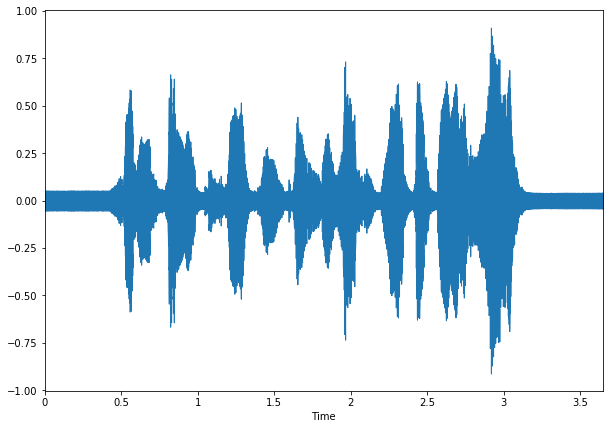

In [149]:
#Checking one file
path=SAVEE+'\\'+'DC_a01.wav'
data,sr=lb.load(path)
plt.figure(figsize=(10,7))
lb.display.waveplot(data,sr=sr)
ipd.Audio(path)
sr

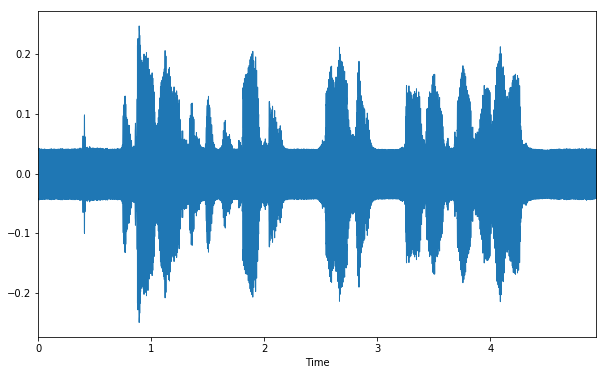

In [150]:
data,sr=lb.load(SAVEE+'\\'+'JE_n28.wav')
plt.figure(figsize=(10,6))
lb.display.waveplot(data,sr=sr)
ipd.Audio(SAVEE+'\\'+'JE_n28.wav')

In [152]:
#RAVDESS

dir_list=os.listdir(RAVDESS)
dir_list.sort()
emo,gender,path=[],[],[]
for f in dir_list:
    fname=os.listdir(RAVDESS+'\\'+f)
    for i in fname:
        p=i.split('.')[0].split('-')
        emo.append(int(p[2]))
        gen=int(p[6])
        if gen%2==0:
            gen="Female"
        else: gen="Male"
        gender.append(gen)
        path.append(RAVDESS+'\\'+f+'\\'+i)

RAVDESS_df=pd.DataFrame(emotion)
RAVDESS_df=RAVDESS_df.replace({1:'neutral',2:'neutral',3:'happy',4:'sad',5:'angry',6:'fear',7:'disgust',8:'surprise'})
RAVDESS_df=pd.concat([pd.DataFrame(gender),RAVDESS_df],axis=1)
RAVDESS_df.columns=(['Gender','Emotions'])
RAVDESS_df['Labels']=RAVDESS_df.Emotions
RAVDESS_df['Source']='RAVDESS'
RAVDESS_df=pd.concat([RAVDESS_df,pd.DataFrame(path,columns=['Path'])],axis=1)
RAVDESS_df=RAVDESS_df.drop(['Gender','Emotions'],axis=1)
RAVDESS_df.Labels.value_counts()
#RAVDESS_df.head()
#RAVDESS_df['Emotions']
RAVDESS_df.to_csv('RAVDESS_df.csv')    
RAVDESS_df.head()

,Labels,Source,Path
0,male angry,RAVDESS,E:\Kaggle\Audio Emo Classifier\RAVDESS\Actor_0...
1,male angry,RAVDESS,E:\Kaggle\Audio Emo Classifier\RAVDESS\Actor_0...
2,male angry,RAVDESS,E:\Kaggle\Audio Emo Classifier\RAVDESS\Actor_0...
3,male angry,RAVDESS,E:\Kaggle\Audio Emo Classifier\RAVDESS\Actor_0...
4,male angry,RAVDESS,E:\Kaggle\Audio Emo Classifier\RAVDESS\Actor_0...


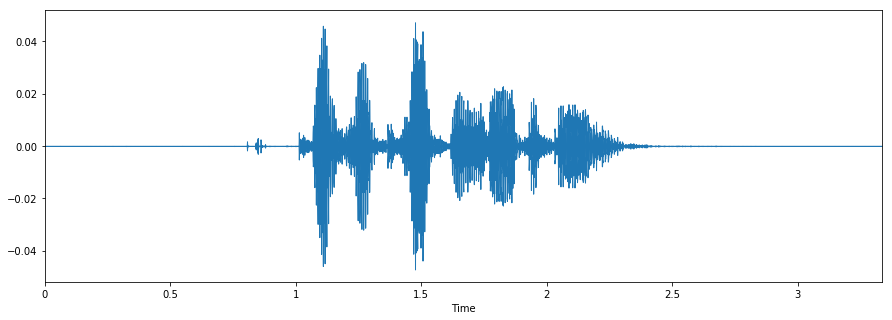

In [153]:
data,sr=lb.load('E:\\Kaggle\\Audio Emo Classifier\\RAVDESS\\Actor_01\\03-01-01-01-01-02-01.wav')
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sr)
ipd.Audio('E:\\Kaggle\\Audio Emo Classifier\\RAVDESS\\Actor_01\\03-01-01-01-01-02-01.wav')

In [155]:
#TESS
dir=os.listdir(TESS)
dir.sort()
dir

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [156]:
path,emo=[],[]

for i in dir:
    fname=os.listdir(TESS+'\\'+i)
    for j in fname:
        if i=='OAF_angry' or i=='YAF_angry':
            emo.append('Female_angry')
        elif i=='OAF_disgust' or i=='YAF_disgust':
            emo.append('Female_disgusted')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emo.append('Female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emo.append('Female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emo.append('Female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emo.append('Female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emo.append('Female_sad')
        else:
            emo.append('Unknown')
        path.append(TESS+'\\'+i+'\\'+j)
TESS_df=pd.DataFrame(emo,columns=['Labels'])
TESS_df['Source']='TESS'
TESS_df=pd.concat([TESS_df,pd.DataFrame(path,columns=['Path'])],axis=1)
TESS_df.Labels.value_counts()
TESS_df.to_csv('TESS_df.csv')
TESS_df.head()

,Labels,Source,Path
0,Female_fear,TESS,E:\Kaggle\Audio Emo Classifier\TESS\TESS Toron...
1,Female_fear,TESS,E:\Kaggle\Audio Emo Classifier\TESS\TESS Toron...
2,Female_fear,TESS,E:\Kaggle\Audio Emo Classifier\TESS\TESS Toron...
3,Female_fear,TESS,E:\Kaggle\Audio Emo Classifier\TESS\TESS Toron...
4,Female_fear,TESS,E:\Kaggle\Audio Emo Classifier\TESS\TESS Toron...


In [157]:
#CREMA_D
dir_c=os.listdir(CREMAD)
dir_c[0:15]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav']

In [158]:
gender,emotion,path=[],[],[]
female=[1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_c:
    part=i.split('_')
    if int(part[0]) in female:
        temp='female'
    else: temp='male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMAD+'\\'+i)

CREMAD_df=pd.DataFrame(emotion,columns=['Labels'])
CREMAD_df['Source']='CREMA_D'
CREMAD_df=pd.concat([CREMAD_df,pd.DataFrame(path,columns=['Path'])],axis=1)
CREMAD_df.Labels.value_counts()
        
CREMAD_df.head() 

,Labels,Source,Path
0,male_angry,CREMA_D,E:\Kaggle\Audio Emo Classifier\CREMAD\AudioWAV...
1,male_disgust,CREMA_D,E:\Kaggle\Audio Emo Classifier\CREMAD\AudioWAV...
2,male_fear,CREMA_D,E:\Kaggle\Audio Emo Classifier\CREMAD\AudioWAV...
3,male_happy,CREMA_D,E:\Kaggle\Audio Emo Classifier\CREMAD\AudioWAV...
4,male_neutral,CREMA_D,E:\Kaggle\Audio Emo Classifier\CREMAD\AudioWAV...


In [159]:
Final=pd.concat([SAVEE_df,RAVDESS_df,TESS_df,CREMAD_df],axis=0)
print(Final.Labels.value_counts())
Final.to_csv('Final_data')
Final.head()

male_neutral        815
male_sad            791
male_fear           791
male_happy          791
male_disgust        671
male_angry          671
female_disgust      600
female_sad          600
female_happy        600
female_fear         600
female_angry        600
female_neutral      512
Female_happy        400
Female_sad          400
Female_neutral      400
Female_angry        400
Female_surprise     400
Female_fear         400
Female_disgusted    400
male angry          240
male_surprise       120
Name: Labels, dtype: int64


,Labels,Source,Path
0,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
1,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
2,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
3,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
4,male angry,SAVEE,E:\Kaggle\Audio Emo Classifier\SAVEE\ALL\DC_a0...
